# MINST Dataset- Hand Written Digit Recognition By S.R.Sezhiyan

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Required Libraries

In [5]:
!pip install opencv-python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing MINST Dataset 

In [6]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [7]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


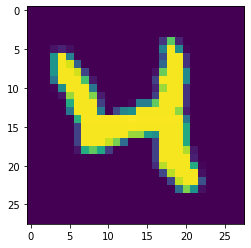

In [16]:
# Displaying the image
plt.imshow(X_train[20])
plt.show()

In [17]:
# print the corresponding label
print(Y_train[25])

2


In [18]:
print(Y_train.shape, Y_test.shape)


(60000,) (10000,)


In [19]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [20]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

# Using Sequential Model Breifing the Neural Network Parameters

In [21]:
# Setting up the layers of the Neural  Network
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),  
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(10, activation='sigmoid')])

In [22]:
# Compiling the Neural Network
model.compile(optimizer='adam', 
                         loss = 'sparse_categorical_crossentropy', 
                         metrics=['accuracy'])

In [23]:
# Training the Neural Network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2973 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1440 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1059 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0874 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0711 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0619 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0542 - accuracy: 0.9825
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0486 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss

# Evaluating The Trained Neural Network

In [32]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9713
0.9713000059127808


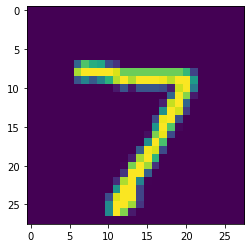

In [24]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [25]:
print(Y_test[0])

7


In [26]:
Y_pred = model.predict(X_test)
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

313/313 [==============================] - 2s 4ms/step
7


In [39]:
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_pred_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Demonstrating The Model Performance Using Confusion Matrix.

Text(0.5, 42.0, 'Predicted Labels')

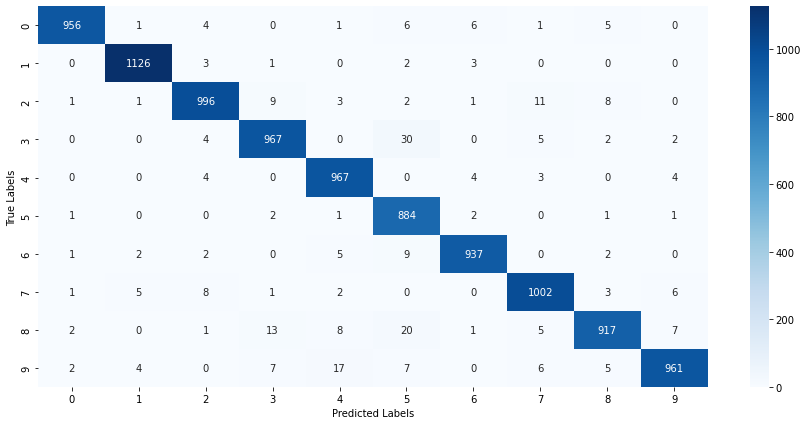

In [42]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
i